In [1]:
import librosa
import librosa.display
import random
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout

### 男

mfccT_label_list_m = []

man_voices = glob.glob("./voice/man_30/*")

for voice in man_voices:
    waveform, sample_rate = librosa.load(voice)
    
    # mfcc作成
    mfcc = librosa.feature.mfcc(y = waveform,sr = sample_rate, n_mfcc = 20)

    # mfcc転置
    mfccT = mfcc.T

    # ラベルベクトルの作成
    label = np.full(mfccT.shape[0], 0)

    # mfccTをリスト
    mfccT_list = mfccT.tolist()

    # ([mfccT],label)の形に変換
    mfccT_label_list = list(zip(mfccT_list, label))

    mfccT_label_list_m = mfccT_label_list_m + mfccT_label_list

### 女

mfccT_label_list_f = []
woman_voices = glob.glob("./voice/female_30/*")

for voice in woman_voices:
    
    waveform, sample_rate = librosa.load(voice)

    # mfcc作成
    mfcc = librosa.feature.mfcc(y = waveform,sr = sample_rate, n_mfcc = 20)

    # mfcc転置
    mfccT = mfcc.T

    # ラベルベクトルの作成
    label = np.full(mfccT.shape[0], 1)

    # mfccTをリスト
    mfccT_list = mfccT.tolist()

    # ([mfccT],label)の形に変換
    mfccT_label_list = list(zip(mfccT_list, label))

    mfccT_label_list_f = mfccT_label_list_f + mfccT_label_list

if len(mfccT_label_list_f) >= len(mfccT_label_list_m):
    del mfccT_label_list_f[len(mfccT_label_list_m):]
else:
    del mfccT_label_list_m[len(mfccT_label_list_f):]

### 合成

# join
merge_list = mfccT_label_list_m + mfccT_label_list_f

# listのシャッフル
random.shuffle(merge_list)

# 逆変換
mfccT_re_tra = np.array([data[0] for data in merge_list[0:int(len(merge_list) * 0.6)]])
mfccT_re_val = np.array([data[0] for data in merge_list[int(len(merge_list) * 0.6):int(len(merge_list) * 0.8)]])
mfccT_re_test = np.array([data[0] for data in merge_list[int(len(merge_list) * 0.8):]])

label_re_tra = np.array([data[1] for data in merge_list[0:int(len(merge_list) * 0.6)]])
label_re_val = np.array([data[1] for data in merge_list[int(len(merge_list) * 0.6):int(len(merge_list) * 0.8)]])
label_re_test = np.array([data[1] for data in merge_list[int(len(merge_list) * 0.8):]])

# モデルの作成
model = Sequential()

model.add(Dense(128, input_dim = 20))
model.add(Activation('softmax'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

# モデルのコンパイル
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics=['accuracy'])

# 訓練の実行
fit = model.fit(mfccT_re_tra, label_re_tra, validation_data = [mfccT_re_val, label_re_val], epochs = 5, batch_size = 32)

# 予測
classes = model.predict(mfccT_re_test, batch_size = 32)

# 結果
score = model.evaluate(mfccT_re_test, label_re_test, batch_size = 32)
print(list(zip(model.metrics_names, score)))

# グラフの出力
fig, (axL, axR) = plt.subplots(ncols = 2, figsize = (10,4))

def plot_history_loss(fit):
    axL.plot(fit.history['loss'],label="loss for training")
    axL.plot(fit.history['val_loss'],label="loss for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')
    
def plot_history_acc(fit):
    axR.plot(fit.history['acc'],label="loss for training")
    axR.plot(fit.history['val_acc'],label="loss for validation")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='upper right')
    
plot_history_loss(fit)
plot_history_acc(fit)
plt.show()
plt.close()

Using TensorFlow backend.


101130
101130
101130
(121356, 20)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2688      
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________
Train on 121356 samples, validate on 40452 samples
Epoch 1/5
121356/121356 [==============================] - 5s 40us/step - loss: 0.5814 - acc: 0.7284 - val_loss: 0.5207 - val_acc: 0.7756
Epoch 2/5
121356/121356 [========================

<Figure size 1000x400 with 2 Axes>

* 128
* 0.7700237318303174

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 258)               5418      
_________________________________________________________________
activation_3 (Activation)    (None, 258)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 259       
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 5,677
Trainable params: 5,677
Non-trainable params: 0
_________________________________________________________________
Train on 121356 samples, validate on 40452 samples
Epoch 1/5
121356/121356 [==============================] - 3s 26us/step - loss: 0.5689 - acc: 0.7494 - val_loss: 0.5166 - val_acc: 0.7765
Epoch 2/5
121356/121356 [==============================] - 3s 25us/step - loss: 0.5

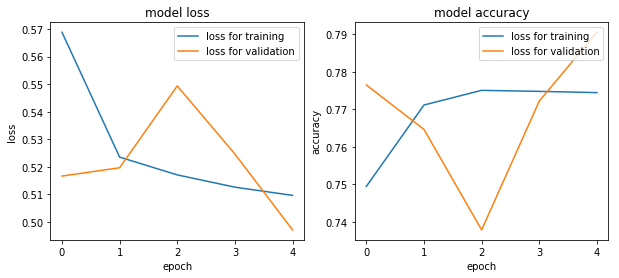

In [2]:
import librosa
import librosa.display
import random
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout

### 男

mfccT_label_list_m = []

man_voices = glob.glob("./voice/man_30/*")

for voice in man_voices:
    waveform, sample_rate = librosa.load(voice)
    
    # mfcc作成
    mfcc = librosa.feature.mfcc(y = waveform,sr = sample_rate, n_mfcc = 20)

    # mfcc転置
    mfccT = mfcc.T

    # ラベルベクトルの作成
    label = np.full(mfccT.shape[0], 0)

    # mfccTをリスト
    mfccT_list = mfccT.tolist()

    # ([mfccT],label)の形に変換
    mfccT_label_list = list(zip(mfccT_list, label))

    mfccT_label_list_m = mfccT_label_list_m + mfccT_label_list

### 女

mfccT_label_list_f = []
woman_voices = glob.glob("./voice/female_30/*")

for voice in woman_voices:
    
    waveform, sample_rate = librosa.load(voice)

    # mfcc作成
    mfcc = librosa.feature.mfcc(y = waveform,sr = sample_rate, n_mfcc = 20)

    # mfcc転置
    mfccT = mfcc.T

    # ラベルベクトルの作成
    label = np.full(mfccT.shape[0], 1)

    # mfccTをリスト
    mfccT_list = mfccT.tolist()

    # ([mfccT],label)の形に変換
    mfccT_label_list = list(zip(mfccT_list, label))

    mfccT_label_list_f = mfccT_label_list_f + mfccT_label_list

if len(mfccT_label_list_f) >= len(mfccT_label_list_m):
    del mfccT_label_list_f[len(mfccT_label_list_m):]
else:
    del mfccT_label_list_m[len(mfccT_label_list_f):]

### 合成

# join
merge_list = mfccT_label_list_m + mfccT_label_list_f

# listのシャッフル
random.shuffle(merge_list)

# 逆変換
mfccT_re_tra = np.array([data[0] for data in merge_list[0:int(len(merge_list) * 0.6)]])
mfccT_re_val = np.array([data[0] for data in merge_list[int(len(merge_list) * 0.6):int(len(merge_list) * 0.8)]])
mfccT_re_test = np.array([data[0] for data in merge_list[int(len(merge_list) * 0.8):]])

label_re_tra = np.array([data[1] for data in merge_list[0:int(len(merge_list) * 0.6)]])
label_re_val = np.array([data[1] for data in merge_list[int(len(merge_list) * 0.6):int(len(merge_list) * 0.8)]])
label_re_test = np.array([data[1] for data in merge_list[int(len(merge_list) * 0.8):]])

# モデルの作成
model = Sequential()

model.add(Dense(258, input_dim = 20))
model.add(Activation('softmax'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

# モデルのコンパイル
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics=['accuracy'])

# 訓練の実行
fit = model.fit(mfccT_re_tra, label_re_tra, validation_data = [mfccT_re_val, label_re_val], epochs = 5, batch_size = 32)

# 予測
classes = model.predict(mfccT_re_test, batch_size = 32)

# 結果
score = model.evaluate(mfccT_re_test, label_re_test, batch_size = 32)
print(list(zip(model.metrics_names, score)))

# グラフの出力
fig, (axL, axR) = plt.subplots(ncols = 2, figsize = (10,4))

def plot_history_loss(fit):
    axL.plot(fit.history['loss'],label="loss for training")
    axL.plot(fit.history['val_loss'],label="loss for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')
    
def plot_history_acc(fit):
    axR.plot(fit.history['acc'],label="loss for training")
    axR.plot(fit.history['val_acc'],label="loss for validation")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='upper right')
    
plot_history_loss(fit)
plot_history_acc(fit)
plt.show()
plt.close()

* 256
* 0.7903935528527638

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 256)               5376      
_________________________________________________________________
activation_59 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_60 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 129       
_________________________________________________________________
activation_61 (Activation)   (None, 1)                 0         
Total params: 38,401
Trainable params: 38,401
Non-trainable params: 0
_________________________________________________________________
Train 

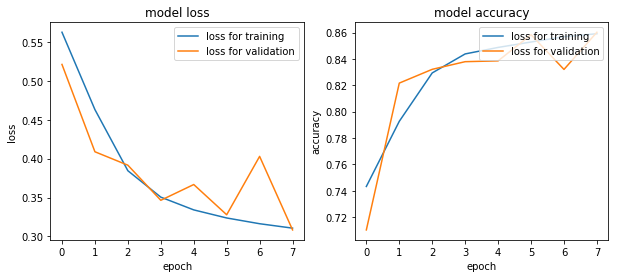

In [26]:
import librosa
import librosa.display
import random
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout

### 男

mfccT_label_list_m = []

man_voices = glob.glob("./voice/man_30/*")

for voice in man_voices:
    waveform, sample_rate = librosa.load(voice)
    
    # mfcc作成
    mfcc = librosa.feature.mfcc(y = waveform,sr = sample_rate, n_mfcc = 20)

    # mfcc転置
    mfccT = mfcc.T

    # ラベルベクトルの作成
    label = np.full(mfccT.shape[0], 0)

    # mfccTをリスト
    mfccT_list = mfccT.tolist()

    # ([mfccT],label)の形に変換
    mfccT_label_list = list(zip(mfccT_list, label))

    mfccT_label_list_m = mfccT_label_list_m + mfccT_label_list

### 女

mfccT_label_list_f = []
woman_voices = glob.glob("./voice/female_30/*")

for voice in woman_voices:
    
    waveform, sample_rate = librosa.load(voice)

    # mfcc作成
    mfcc = librosa.feature.mfcc(y = waveform,sr = sample_rate, n_mfcc = 20)

    # mfcc転置
    mfccT = mfcc.T

    # ラベルベクトルの作成
    label = np.full(mfccT.shape[0], 1)

    # mfccTをリスト
    mfccT_list = mfccT.tolist()

    # ([mfccT],label)の形に変換
    mfccT_label_list = list(zip(mfccT_list, label))

    mfccT_label_list_f = mfccT_label_list_f + mfccT_label_list

if len(mfccT_label_list_f) >= len(mfccT_label_list_m):
    del mfccT_label_list_f[len(mfccT_label_list_m):]
else:
    del mfccT_label_list_m[len(mfccT_label_list_f):]

### 合成

# join
merge_list = mfccT_label_list_m + mfccT_label_list_f

# listのシャッフル
random.shuffle(merge_list)

# 逆変換
mfccT_re_tra = np.array([data[0] for data in merge_list[0:int(len(merge_list) * 0.6)]])
mfccT_re_val = np.array([data[0] for data in merge_list[int(len(merge_list) * 0.6):int(len(merge_list) * 0.8)]])
mfccT_re_test = np.array([data[0] for data in merge_list[int(len(merge_list) * 0.8):]])

label_re_tra = np.array([data[1] for data in merge_list[0:int(len(merge_list) * 0.6)]])
label_re_val = np.array([data[1] for data in merge_list[int(len(merge_list) * 0.6):int(len(merge_list) * 0.8)]])
label_re_test = np.array([data[1] for data in merge_list[int(len(merge_list) * 0.8):]])

# モデルの作成
model = Sequential()

model.add(Dense(256, input_dim = 20))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('softmax'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

# モデルのコンパイル
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics=['accuracy'])

# 訓練の実行
fit = model.fit(mfccT_re_tra, label_re_tra, validation_data = [mfccT_re_val, label_re_val], epochs = 8, batch_size = 32)

# 予測
classes = model.predict(mfccT_re_test, batch_size = 32)

# 結果
score = model.evaluate(mfccT_re_test, label_re_test, batch_size = 32)
print(list(zip(model.metrics_names, score)))

# グラフの出力
fig, (axL, axR) = plt.subplots(ncols = 2, figsize = (10,4))

def plot_history_loss(fit):
    axL.plot(fit.history['loss'],label="loss for training")
    axL.plot(fit.history['val_loss'],label="loss for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')
    
def plot_history_acc(fit):
    axR.plot(fit.history['acc'],label="loss for training")
    axR.plot(fit.history['val_acc'],label="loss for validation")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='upper right')
    
plot_history_loss(fit)
plot_history_acc(fit)
plt.show()
plt.close()

* 割とよくなった